In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read data
#df = pd.read_csv('csvData/articledataDBmerged.csv',  skip_blank_lines=True, skiprows=0, index_col=0)
df = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
#df = pd.read_csv("git_SeparationJackson/dfwithkhdelta.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
#df = pd.read_csv('csvData/articledataDBextCalcD.dat',  skip_blank_lines=True, skiprows=0)
#df = pd.read_csv('csvData/articledataDBmerged.csv',  skip_blank_lines=True, skiprows=0,  index_col=0)
#df = pd.read_csv('csvData/ModelDBentryTrim.csv', index_col=0, skip_blank_lines=True, skiprows=1)
df

,cid,cid_PM,cid_solvent,cid_acid,CextratantEq (M),ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),...,Rotatable bond count_acid,H bond donor count_acid,H bond acceptor count_acid,Charge_acid,Covalent Unit count_acid,TPSA_acid,Wiener_acid,Branching Index_acid,Polarity Index_acid,Heterogeneity Index_acid
0,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
1,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
2,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
3,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
4,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.02,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8162,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.08,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8163,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.06,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8164,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.04,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708


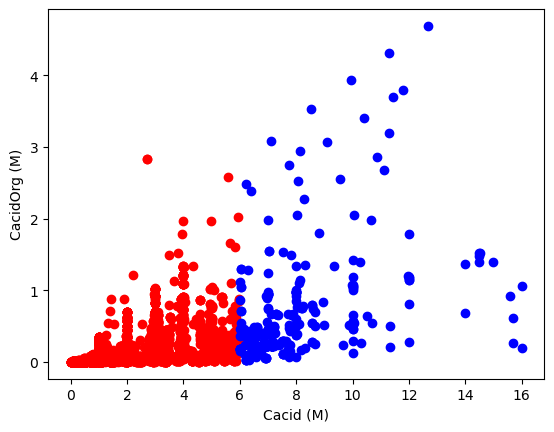

In [3]:
dfT = df[df['CacidOrg (M)'].isna() == False]
nodeField = 'Cacid (M)'
threshold= 6
node1 = dfT[dfT[nodeField] < threshold][[nodeField,'CacidOrg (M)']]
node2 = dfT[dfT[nodeField] > threshold][[nodeField,'CacidOrg (M)']]

plt.xlabel(nodeField)
plt.ylabel('CacidOrg (M)')
plt.scatter(node1[nodeField],node1['CacidOrg (M)'], color='red')
plt.scatter(node2[nodeField],node2['CacidOrg (M)'], color='blue')
plt.show()


#entropyN1 = np.sum( node1['CacidOrg (M)']*np.log(node1['CacidOrg (M)']))


### Now we should find the important collumns that we are going to use

In [4]:
#fields that are going to be the input
#there are pre-set to test, use inputFields, yfield to set the desired calculation
i1 = ['Cextractant (M)','Cacid (M)']
i2 = ['Cextractant (M)','Cacid (M)', 'XlogP']
i3 = ['Cextractant (M)','Cacid (M)', 'XlogP', 'Polarity Index']
i4 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)']
i5 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)','Cion (M)']
i6 = ['Cextractant (M)','Cacid (M)', 'Cion (M)']
i7 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index']
i8 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener']
i9 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener', 'Heterogeneity Index']
i10 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i11 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i12 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)']
i13 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)','Cpm (M)']
i14 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index','Cpm (M)']
i15 = ['Cextractant (M)', 'intensity', 'Cacid (M)','Molecular Weight', 'XlogP',
       'Rotatable bond count', 'H bond donor count', 'H bond acceptor count',
       'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index']

i16 = ['Cextractant (M)', 'Rg', 'has acid?']
i17 = ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)']
i18 = ['Cextractant (M)', 'Cacid (M)', 'Branching Index']
i19= ['Cextractant (M)', 'Rg', 'Temp (K)']
i20 = ['Cextractant (M)', 'Cacid (M)', 'Cion (M)', 'XlogP']
i21 = ['Cacid (M)', 'Cpm (M)', 'Polarity Index', 'Heterogeneity Index']
i22= ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Branching Index']
#, ('Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Polarity Index'), ('Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Heterogeneity Index')
i23 = ['Cextractant (M)', 'Rg', 'Temp (K)', 'Molecular Weight']
i24 = ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index', 'Polarity Index', 'Heterogeneity Index']
i25 = ['Cextractant (M)','Cacid (M)','Cpm (M)','XlogP']
i26 = ['Cextractant (M)', 'Cacid (M)', 'H bond acceptor count', 'Polarity Index', 'Heterogeneity Index']

i27= ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)','XlogP','H bond acceptor count', 'Polarity Index', 'Heterogeneity Index', 'Branching Index']

t1 = ['Cextractant (M)','Cacid (M)']
t2 = ['Cextractant (M)','Cacid (M)', 'XlogP']
t3 = ['Cextractant (M)','Cacid (M)', 'Polarity Index']
t4 = ['Cextractant (M)','Cacid (M)', 'Branching Index']
t5 = ['Cextractant (M)','Cacid (M)', 'Heterogeneity Index']
t6 = ['Cextractant (M)','Cacid (M)', 'Wiener']
t7 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener']#, 'Kh', 'DeltaG (kJ/mol)']

o1 = ['CacidOrg (M)']
o2 = ['CionOrg (M)']
o3 = ['D(acid)']
o4 = ['D(ion)']
o5 = ['Rg']
o6 = ['ExtractantMonomer (%)']
o7 = ['AverageAggregateSize (A)']

inputField = t7
outputFields = o1

In [5]:

#extra condition to separate the database
dfSize=df[ (df['has PM?'] == 0) & (df['Third phase'] == 0)]
#dfSize = df

#Cleaning the null and NaN fields
feature = dfSize[inputField+outputFields].copy()
feature = feature.dropna()
feature = feature.drop_duplicates()
feature = feature.reset_index(drop=True)  ## this line is important, otherwise the indexes will be wierd
feature

,Cextractant (M),Cacid (M),XlogP,Polarity Index,Branching Index,Heterogeneity Index,Wiener,CacidOrg (M)
0,0.2010,1.000000,17.1,3.722409,144.0,8.416,13036.0,0.019000
1,0.1000,1.000000,17.1,3.722409,144.0,8.416,13036.0,0.011000
2,0.0500,1.000000,17.1,3.722409,144.0,8.416,13036.0,0.008000
3,0.2520,1.000000,17.1,3.722409,144.0,8.416,13036.0,0.025000
4,0.2000,2.987212,11.6,3.722409,360.0,8.774,6572.0,0.175497
...,...,...,...,...,...,...,...,...
1972,1.4719,8.598368,2.9,6.211799,30.0,8.888,616.0,0.732297
1973,1.4719,7.756384,2.9,6.211799,30.0,8.888,616.0,0.515313
1974,1.4719,7.201227,2.9,6.211799,30.0,8.888,616.0,0.406584
1975,1.4719,6.317099,2.9,6.211799,30.0,8.888,616.0,0.281385


## Decision tree classifier/prediction?

In [6]:
#define the category values
y = feature['CacidOrg (M)'].values
y

feature = feature.drop('CacidOrg (M)', axis=1)
feature_list = list(feature.columns)
#feature_list
X = np.array(feature)
#X[0:5,::]


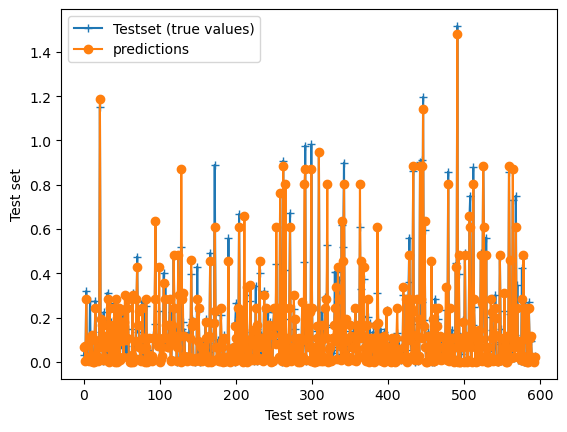

DecisionTrees's R2:  0.9089234660475882
Root mean square error: 0.06078944364447155
Mean Absolute Error: 0.007196907999823519 M


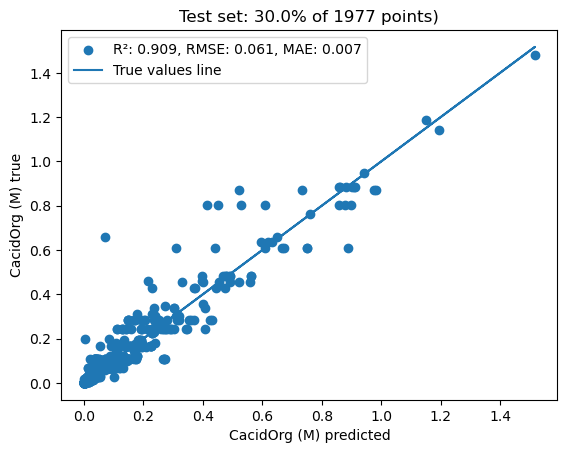

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


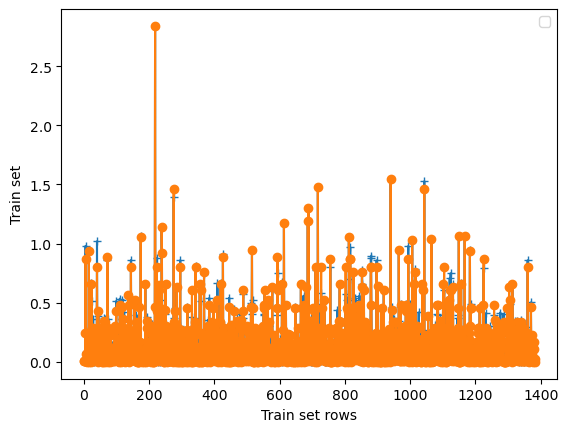

DecisionTrees's R2:  0.9708322049533785
Root mean square error: 0.03838078338262218
Mean Absolute Error: 2.2477400353943878e-18 M


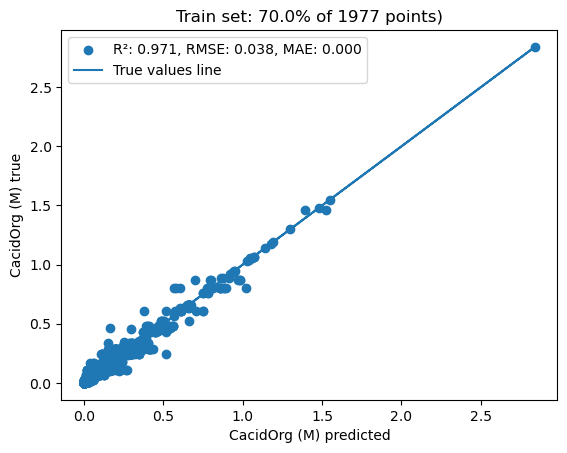

In [7]:
#split the data set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=3)
#create the classifier
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
from sklearn import metrics

myTree = DecisionTreeRegressor(max_depth=8) #use 2^max_depth = number of possible branches...
myTree # it shows the default parameters

#fit the train set...
myTree.fit(X_trainset,y_trainset)
#now that it is trained we can make some predictions
predTree = myTree.predict(X_testset)
predictionsTrain = myTree.predict(X_trainset)
#print (predTree[0:10])
#print (y_testset[0:10])

plt.xlabel("Test set rows")
plt.ylabel("Test set")
plt.plot(y_testset, marker='+', label='Testset (true values)')
plt.plot(predTree, marker = 'o', label='predictions')
plt.legend()
plt.show()

r2 = metrics.r2_score(y_testset,predTree)
rmse = np.sqrt(metrics.mean_squared_error(y_testset, predTree))
mae = np.abs(np.mean(y_testset-predTree))
#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')

plt.scatter(y_testset, predTree, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.xlabel("CacidOrg (M) predicted")
plt.ylabel("CacidOrg (M) true")
plt.title('Model Performance')
plt.plot(y_testset, y_testset, label='True values line')
plt.title('Test set: '+f"{100*len(y_testset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()
#_______tranning information
plt.xlabel("Train set rows")
plt.ylabel("Train set")
plt.plot(y_trainset, marker='+')
plt.plot(predictionsTrain, marker = 'o')
plt.legend()
plt.show()

r2 = metrics.r2_score(y_trainset,predictionsTrain)
rmse = np.sqrt(metrics.mean_squared_error(y_trainset, predictionsTrain))
mae = np.abs(np.mean(y_trainset-predictionsTrain))
#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')

plt.xlabel("CacidOrg (M) predicted")
plt.ylabel("CacidOrg (M) true")
plt.scatter(y_trainset, predictionsTrain, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.plot(y_trainset, y_trainset, label='True values line')
plt.title('Train set: '+f"{100*len(y_trainset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()



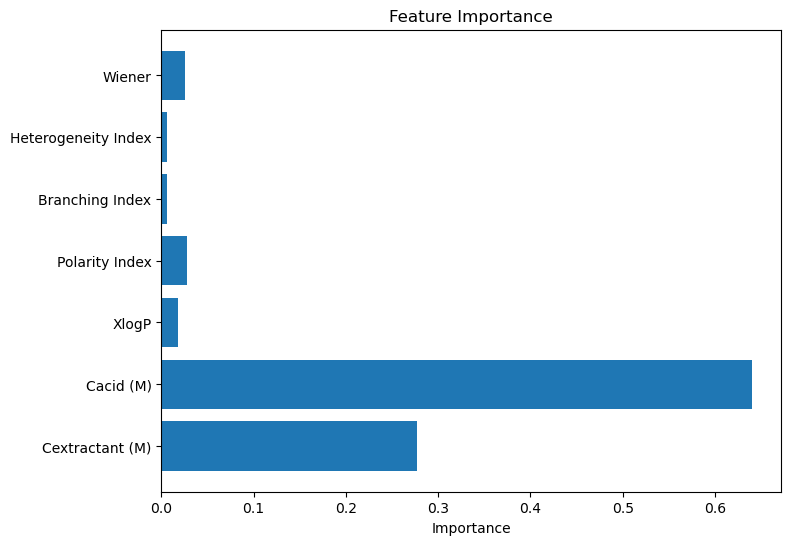

In [8]:
import matplotlib.pyplot as plt

# Assuming tree_model is the trained model
importances = myTree.feature_importances_


# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_list, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


> I can get 0.88/0.94 for CacidOrg, based on i14 o1, for data with no PM...

In [12]:
#Look what are the experimental configuration of the points that deviate a lot.
dfDeviation = pd.DataFrame( X_testset[(y_testset-predTree)>0.05] , columns= feature_list)
dfDeviation.sort_values(by=['Cextractant (M)','Cacid (M)'])

,Cextractant (M),Cacid (M),XlogP,Polarity Index,Branching Index,Heterogeneity Index,Wiener
32,0.10000,3.309446,12.2,3.722409,220.0,8.595,7116.0
18,0.10000,6.944291,12.8,3.722409,120.0,8.416,7660.0
1,0.10000,6.946114,12.8,3.722409,120.0,8.416,7660.0
16,0.10000,6.947655,12.8,3.722409,120.0,8.416,7660.0
8,0.10000,6.949928,12.8,3.722409,120.0,8.416,7660.0
22,0.10000,6.953700,12.8,3.722409,120.0,8.416,7660.0
30,0.15156,1.000000,12.8,3.722409,120.0,8.416,7660.0
43,0.15271,1.000000,12.8,3.722409,120.0,8.416,7660.0
38,0.16703,1.000000,12.8,3.722409,120.0,8.416,7660.0
45,0.19790,3.900000,12.8,3.722409,120.0,8.416,7660.0


In [13]:
#Look what are the experimental configuration of the points that deviate a lot.
#lista =  feature_list+list([y])+list(['ypred','error'])
#reconstructedPrediction = pd.DataFrame([X_test,y_test, ypred], columns=lista)
#reconstructedPrediction = pd.DataFrame(data=np.column_stack((X_testset, y_testset, predTree, y_testset-predTree)), columns=lista)
#reconstructedPrediction

In [14]:
text_representation = tree.export_text(myTree)
#print(text_representation)
##recover original names of variables...
tnew = text_representation  #.replace("feature_0","has Acid?")

#names = ['ExtractantName', 'SolventName', 'AcidName',
#       'has acid?', 'Cacid (M)', 'CacidOrg (M)', 'ExtractionFactor',
#       'has ions?', 'xlogp', 'molecular_weight', 'h_bond_donor_count']

print(feature_list)

for i,name in enumerate(feature_list):
    tnew = tnew.replace('feature_'+str(i), name)

print(tnew)
outputTree = open('tree.dat','w+')
outputTree.write(tnew)
outputTree.close()


['Cextractant (M)', 'Cacid (M)', 'XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener']
|--- Cacid (M) <= 2.97
|   |--- Cacid (M) <= 1.95
|   |   |--- Cacid (M) <= 0.74
|   |   |   |--- Cacid (M) <= 0.47
|   |   |   |   |--- Branching Index <= 126.00
|   |   |   |   |   |--- Cextractant (M) <= 0.15
|   |   |   |   |   |   |--- Cacid (M) <= 0.16
|   |   |   |   |   |   |   |--- Cacid (M) <= 0.10
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Cacid (M) >  0.10
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- Cacid (M) >  0.16
|   |   |   |   |   |   |   |--- Cacid (M) <= 0.21
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- Cacid (M) >  0.21
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- Cextractant (M) >  0.15
|   |   |   |   |   |   |--- Cextractant (M) <= 0.25
|   |   |   |   |   |   |   |--- Cacid (M) <= 0.09
|   |   |   |   |   |

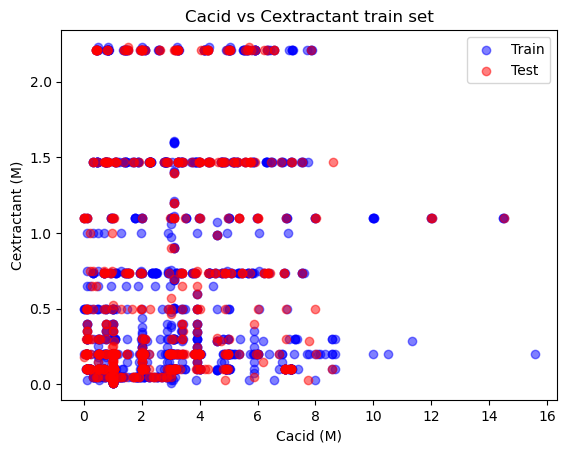

In [15]:
plt.title('Cacid vs Cextractant train set')
plt.xlabel('Cacid (M)')
plt.ylabel('Cextractant (M)')
plt.scatter(X_trainset[:,1] ,X_trainset[:,0] , color='blue' , alpha=0.5, label='Train')
plt.scatter(X_testset[:, 1], X_testset[:, 0], color ='red', alpha=0.5, label='Test')
plt.legend()

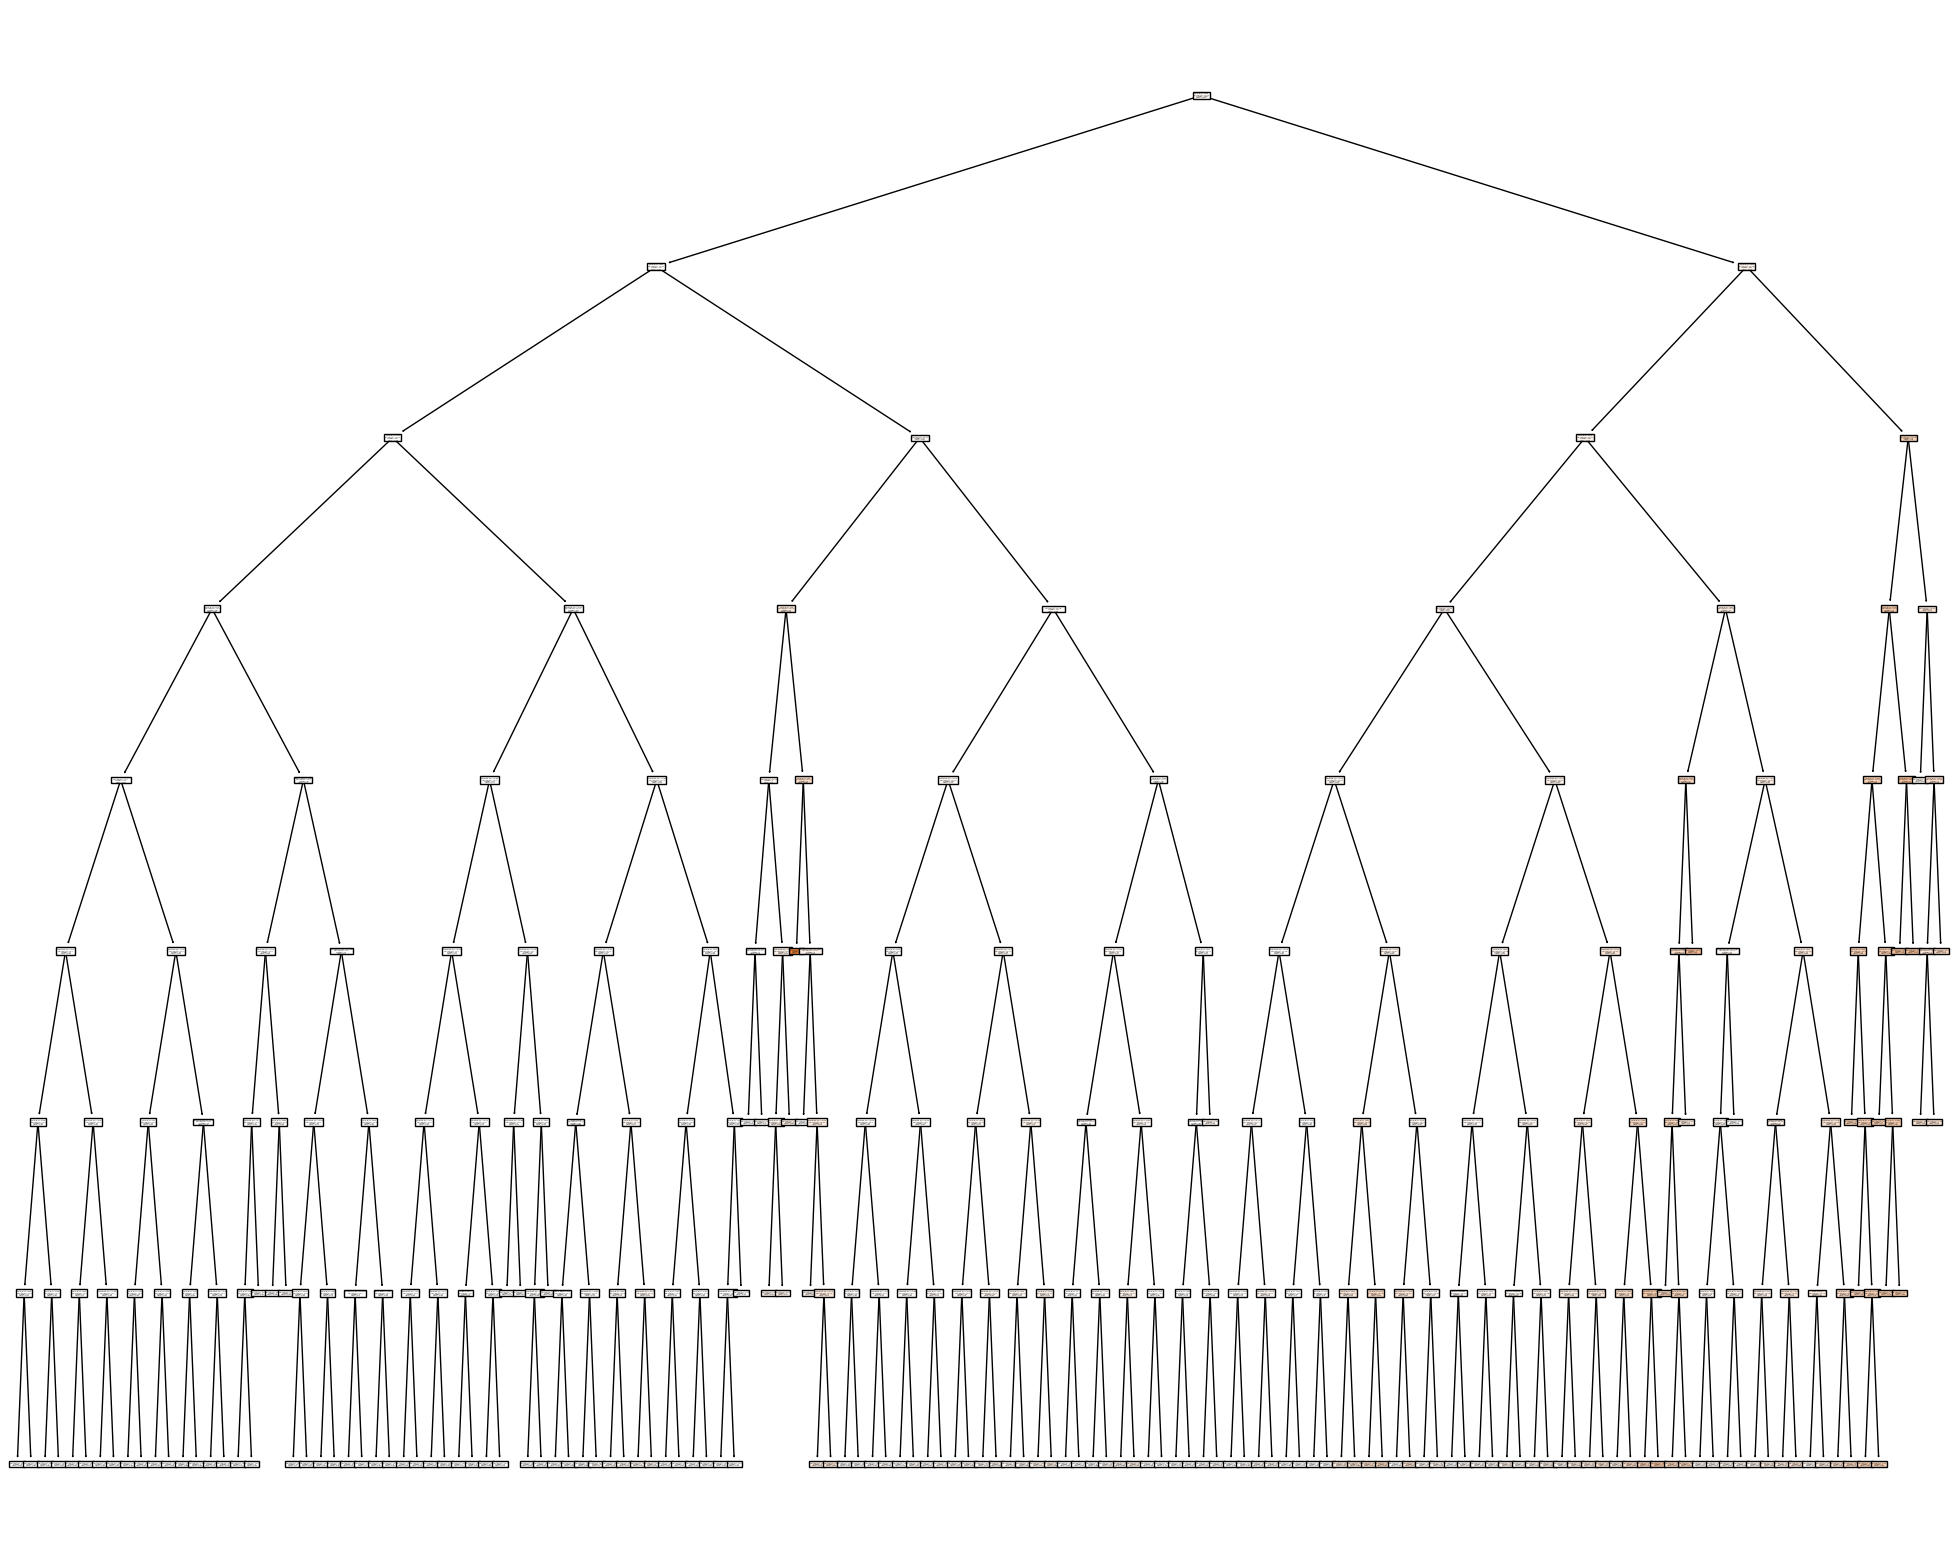

In [16]:
#%matplotlib inline

#fnames=['ExtractantName', 'SolventName', 'AcidName', 'AverageAggregateSize (A)',
#       'has acid?', 'Cacid (M)', 'has ions?', 'xlogp', 'molecular_weight',
#       'h_bond_donor_count']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(myTree,
                   feature_names= feature_list,
                   class_names= ['Third phase', 'Biphasic'] ,
                   filled=True)
#fig.savefig("0decistion_tree.png")
#plot.show()

___
# RANDOM FOREST
___

In [45]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#1000 42 give awesome results
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_trainset, y_trainset)

RandomForestRegressor(n_estimators=1000, random_state=42)

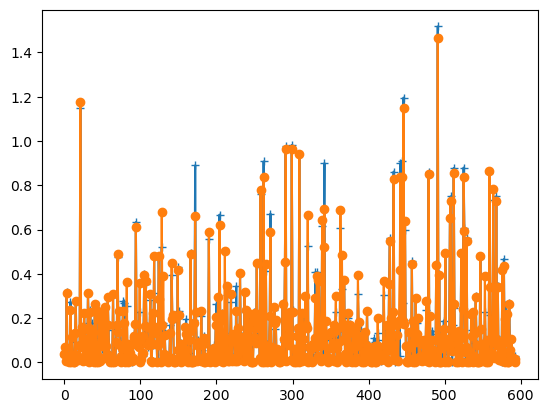

DecisionTrees's R2:  0.9608341913581746
Root mean square error: 0.0398637793427596
Mean Absolute Error: 0.004663245866370839 M


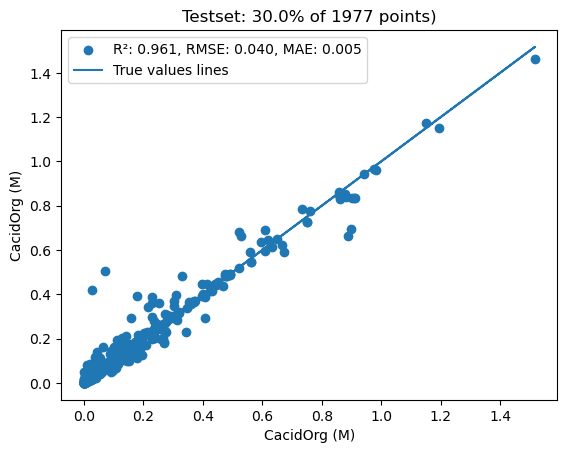

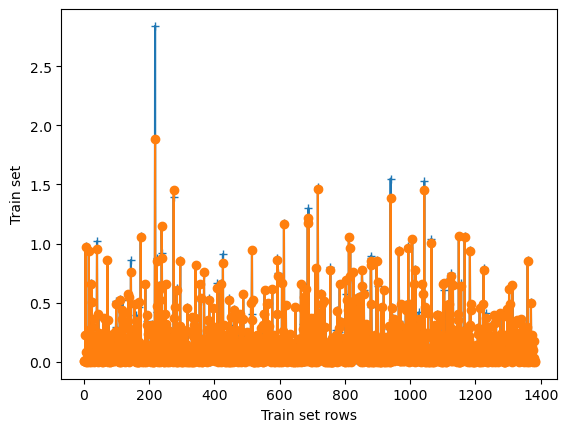

DecisionTrees's R2:  0.9814805226885853
Root mean square error: 0.03058274034787427
Mean Absolute Error: 0.0002055743298563682 M


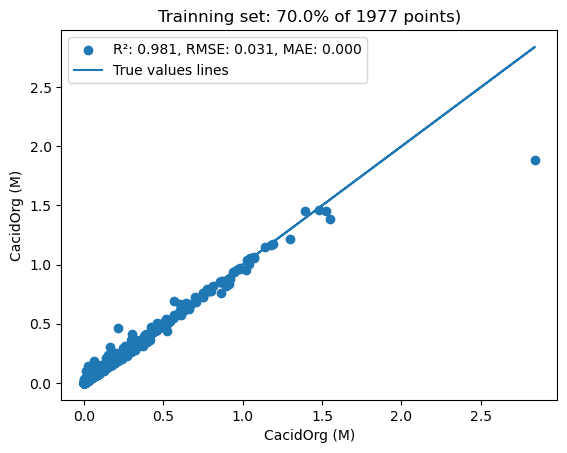

In [51]:
# Use the forest's predict method on the train and test data
predictionsTrain = rf.predict(X_trainset)
predictions = rf.predict(X_testset)
# Calculate the absolute errors
errors = abs(predictions - y_testset)

plt.plot(y_testset, marker='+')
plt.plot(predictions, marker = 'o')
plt.show()

r2 = metrics.r2_score(y_testset,predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_testset, predictions))
mae = np.abs(np.mean(y_testset-predictions))

#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')
plt.xlabel("CacidOrg (M)")
plt.ylabel("CacidOrg (M)")
plt.scatter(y_testset, predictions, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.plot(y_testset, y_testset, label='True values lines')
plt.title('Testset: '+f"{100*len(y_testset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()


#_____________________________

errors = abs(predictionsTrain - y_trainset)
plt.xlabel("Train set rows")
plt.ylabel("Train set")
plt.plot(y_trainset, marker='+')
plt.plot(predictionsTrain, marker = 'o')
plt.show()


r2 = metrics.r2_score(y_trainset,predictionsTrain)
rmse = np.sqrt(metrics.mean_squared_error(y_trainset, predictionsTrain))
mae = np.abs(np.mean(y_trainset-predictionsTrain))
#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", r2)
print("Root mean square error:", rmse)
print('Mean Absolute Error:',mae , 'M')

plt.xlabel("CacidOrg (M)")
plt.ylabel("CacidOrg (M)")
plt.scatter(y_trainset, predictionsTrain, label=f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")
plt.plot(y_trainset, y_trainset, label='True values lines')
plt.title('Trainning set: '+f"{100*len(y_trainset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.legend()
plt.show()


